<img style="float: left; margin-bottom: 1em" src="images/excelerate.png" width="200">
<img style="float: right; margin-bottom: 1em" src="images/surfsara.png" width="150">
<hr style="clear: both"/>

# Your first convolutional neural network
In this notebook you will learn how to build and train a convolutional neural network (CNN) yourself, and to figure out what the network is learning.

We will continue with the leaf classification problem from before, and make it a bit harder. Instead of the ten classes from before, we now have 15, with and build a first CNN to evaluate its performance against a typical dense network.

Let's load the data first. It consists of a training and validation set. Let's print the class names as well:

In [ ]:
import lib
import keras

%config InlineBackend.figure_format = 'retina'

(X_train, Y_train), (X_val, Y_val), labels = lib.dataset_plant_village_small()

for index, name in enumerate(labels):
    print('{}: {}'.format(str(index).rjust(2), name))

Let's have a look at some of the examples in the data set:

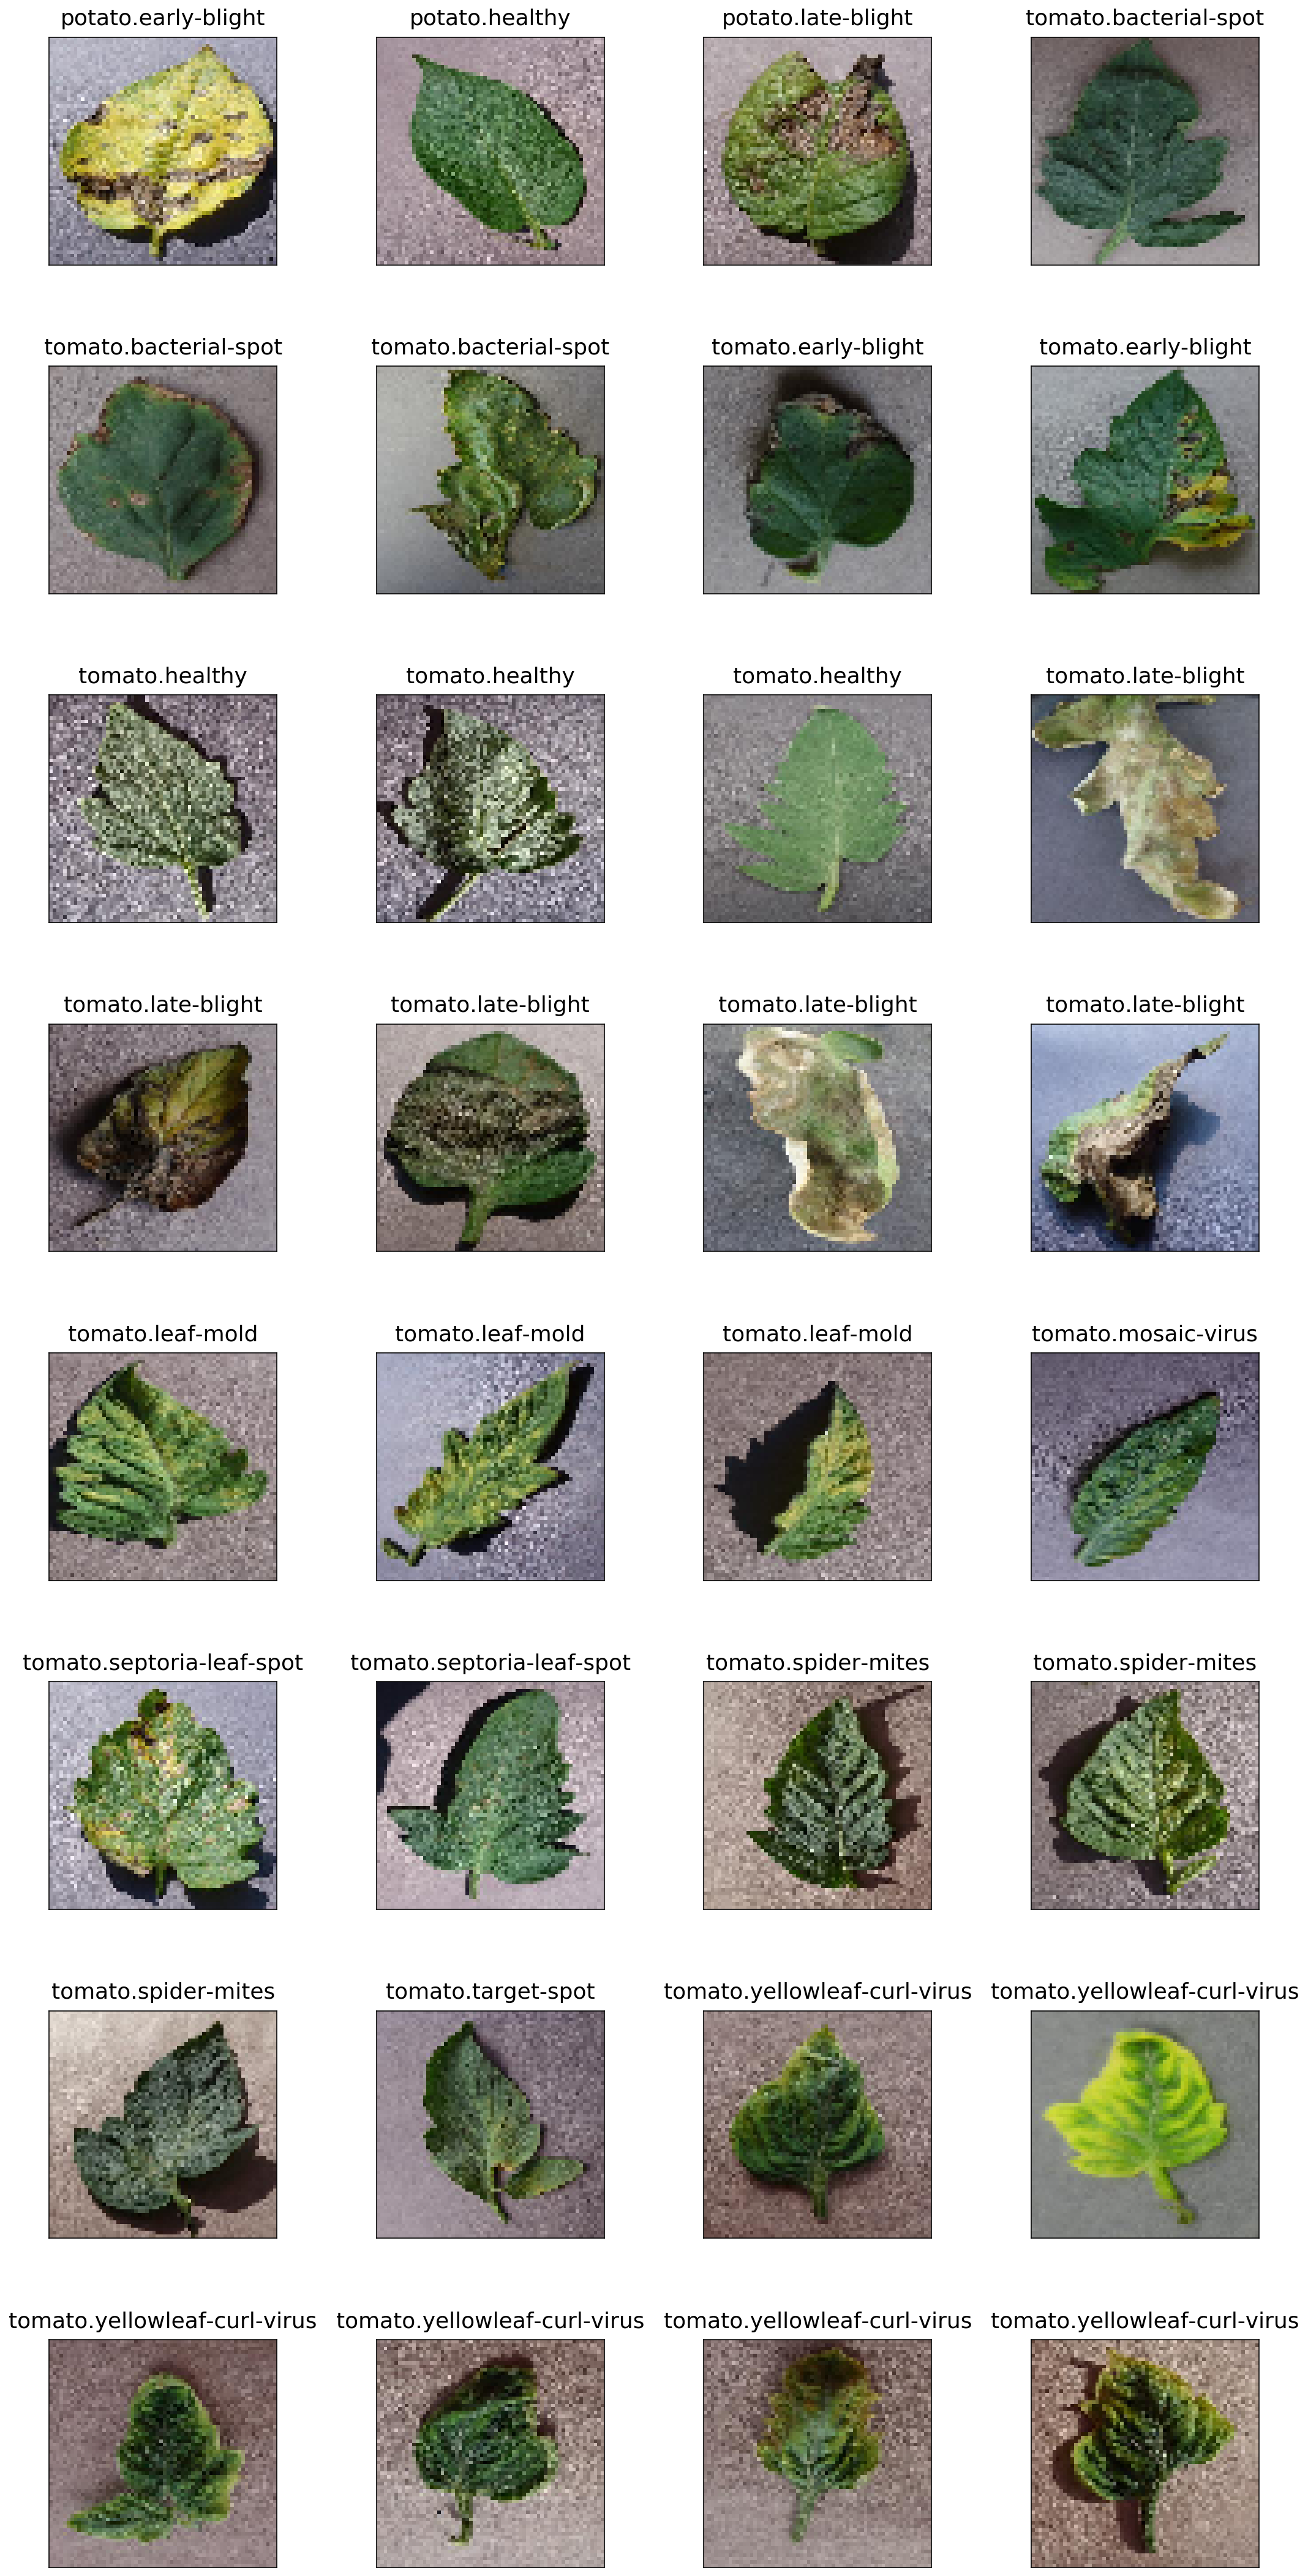

In [2]:
lib.plot_examples(X_train[:32], Y_train[:32], labels);

## Exercise 1
It's always a good idea to establish a baseline performance to compare later models against. Build a small dense network to solve this 15-class classification problem by filling out the skeleton below. Create a hidden layer with softmax activation, and two dense hidden layers before that with 512 and 256 units, respectively. Train the network for 10 epochs with learning rate 0.001.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=data_train.image_shape))
# <FILL IN>
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=<FILL IN>
)
lib.plot_history(history);

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6291968   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 15)                3855      
Total params: 6,427,151
Trainable params: 6,427,151
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 16516 samples, validate on 4122 samples
Epoch 1/10
16516/16516 [==============================] - 16s 965us/step - loss: 3.7989 - acc: 

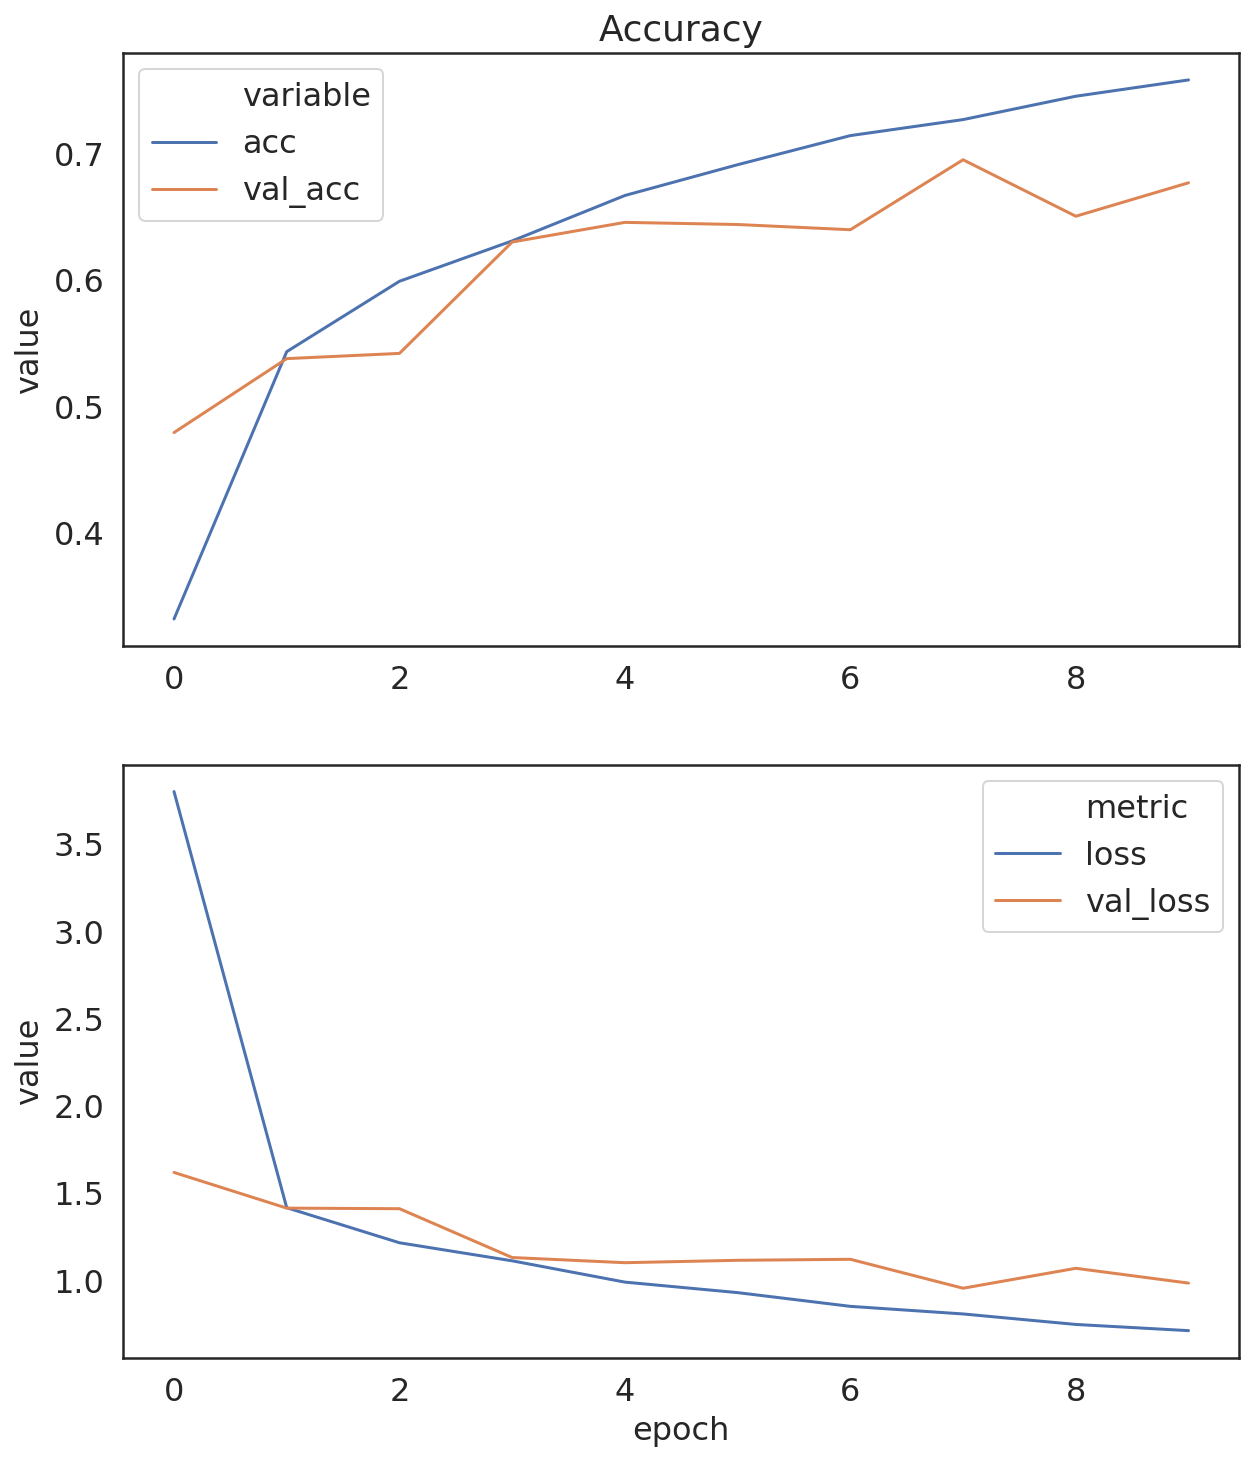

In [3]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10
)
lib.plot_history(history);

The images used in the previous exercise are quite small: 64 by 64 pixels. Already, with a relatively small network and a small training set, the training time is quite high. This problem becomes worse with bigger images. When an image becomes twice as big, the number of parameters in the first dense layer will increase by a factor four. In addition, although the model improves, it does so very slowly.

Clearly, we need a more scalable solution. CNNs provide a less complex model to reduce training time, and also allow us to do **local feature detection**: convolutional layers detect patterns in the image independent of their position.

## Exercise 2
Train a simple convolutional neural network to solve this problem by filling out the skeleton below.

In the first convolutional layer, use 32 filters and a kernel size of 3, with 'relu' activation. The last layer should be a single dense layer of 15 units with softmax activation, similar to the last layer in the dense network you created in exercise 1.

Train for 10 epochs with a learning rate of 0.001.

In [ ]:
from keras.layers import Conv2D, MaxPool2D

model = Sequential()
# First conv. -> max. pool block

model.add(Conv2D(filters=<FILL IN>, kernel_size=<FILL IN>, activation='<FILL IN>', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Dense layers for final classification

model.add(Flatten())
# <FILL IN>
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=<FILL IN>
)
lib.plot_history(history);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                461295    
Total params: 462,191
Trainable params: 462,191
Non-trainable params: 0
_________________________________________________________________
Train on 16516 samples, validate on 4122 samples
Epoch 1/10
16516/16516 [==============================] - 14s 870us/step - loss: 1.2161 - acc: 0.6321 - val_loss: 0.8395 - val_acc: 0.7295
Epoch 2/10
16516/16516 [==============================] - 14s 847us/step - loss:

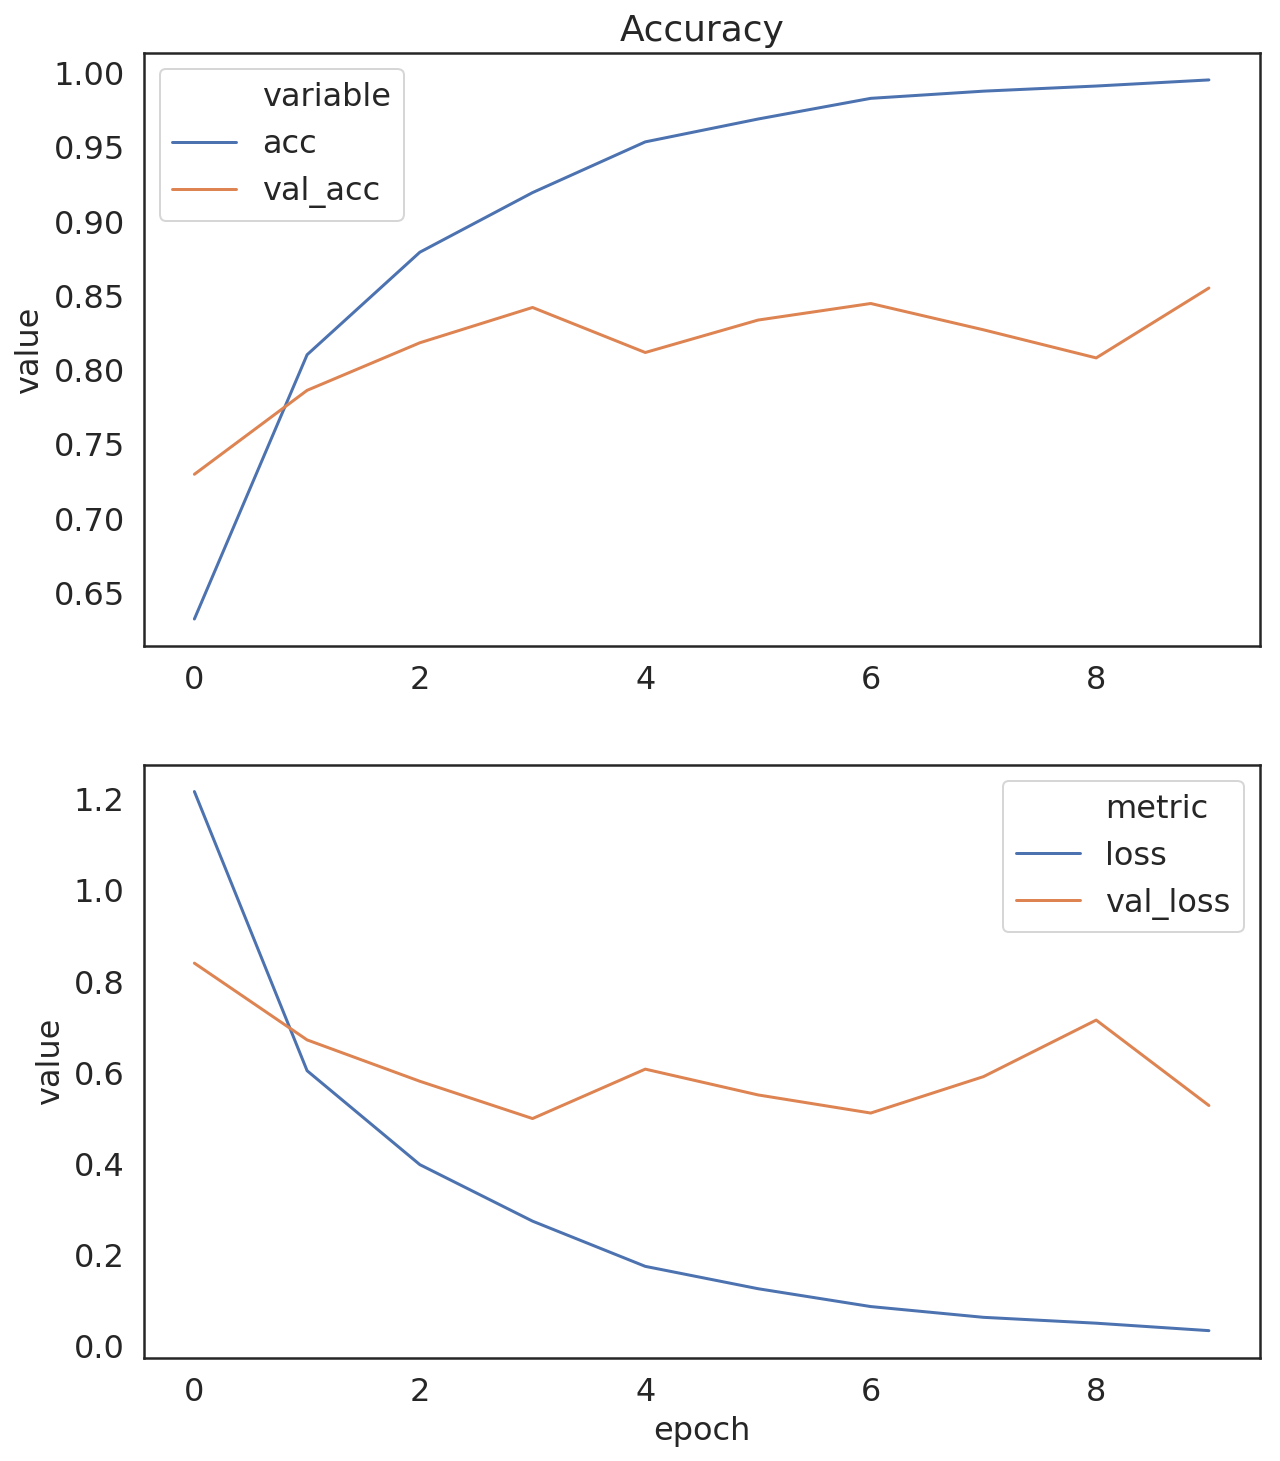

In [4]:
# SOLUTION

from keras.layers import Conv2D, MaxPool2D

model = Sequential()
# First conv. -> max. pool block

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Dense layers for final classification

model.add(Flatten())
model.add(Dense(15, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10
)
lib.plot_history(history);

## Exercise 3
We see that the CNN performs better than the dense network because the accuracy at epoch 10 is much higher for the CNN. Why do you think it performs much better than the dense network? Write down your answer in the cell below.

**Hint**: convolutional layers activate **independent** of the location of a particular pattern. How would that help for this particular classification problem?

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: classifying many of the diseases in the data set requires detection of certain patterns in the image regardless of their position, e.g. yellow edges of the leaves for yellow leaf curl virus, and brown spots for blight.

It is generally much harder to train a dense network to detect these patterns wherever they may appear in the input image. Each dense layer makes a decision based on **all** input information. Convolutional layers train filters that are **applied locally**, and fire when they detect a certain pattern. In this way, they preserve the image structure that disappears in fully-connected layers.

## Exercise 4
In exercise 2 you created a network with a single convolution 'block', consisting of a convolution layer and max pooling layer. The power of convolutional neural networks comes from building a **feature hierarchy** by stacking several of these blocks after each other.

In the skeleton below, stack a number of these blocks on top of each other by copy-pasting the first block. Each block should model more complexity, so multiply the number of kernels (the first parameter, 32 in the first block) for each block. This means that the first convolutional layer should have 32 kernels, the second 64, the third 128, etc. Try to have at least three of these blocks after each other.

Train the network with 10 epochs and a learning rate of your choice, and try to get the training accuracy above 0.95.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# <FILL IN>

# Dense network for end classification

model.add(Flatten())
model.add(Dense(15, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10
)
lib.plot_history(history);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 256)         295168    
__________

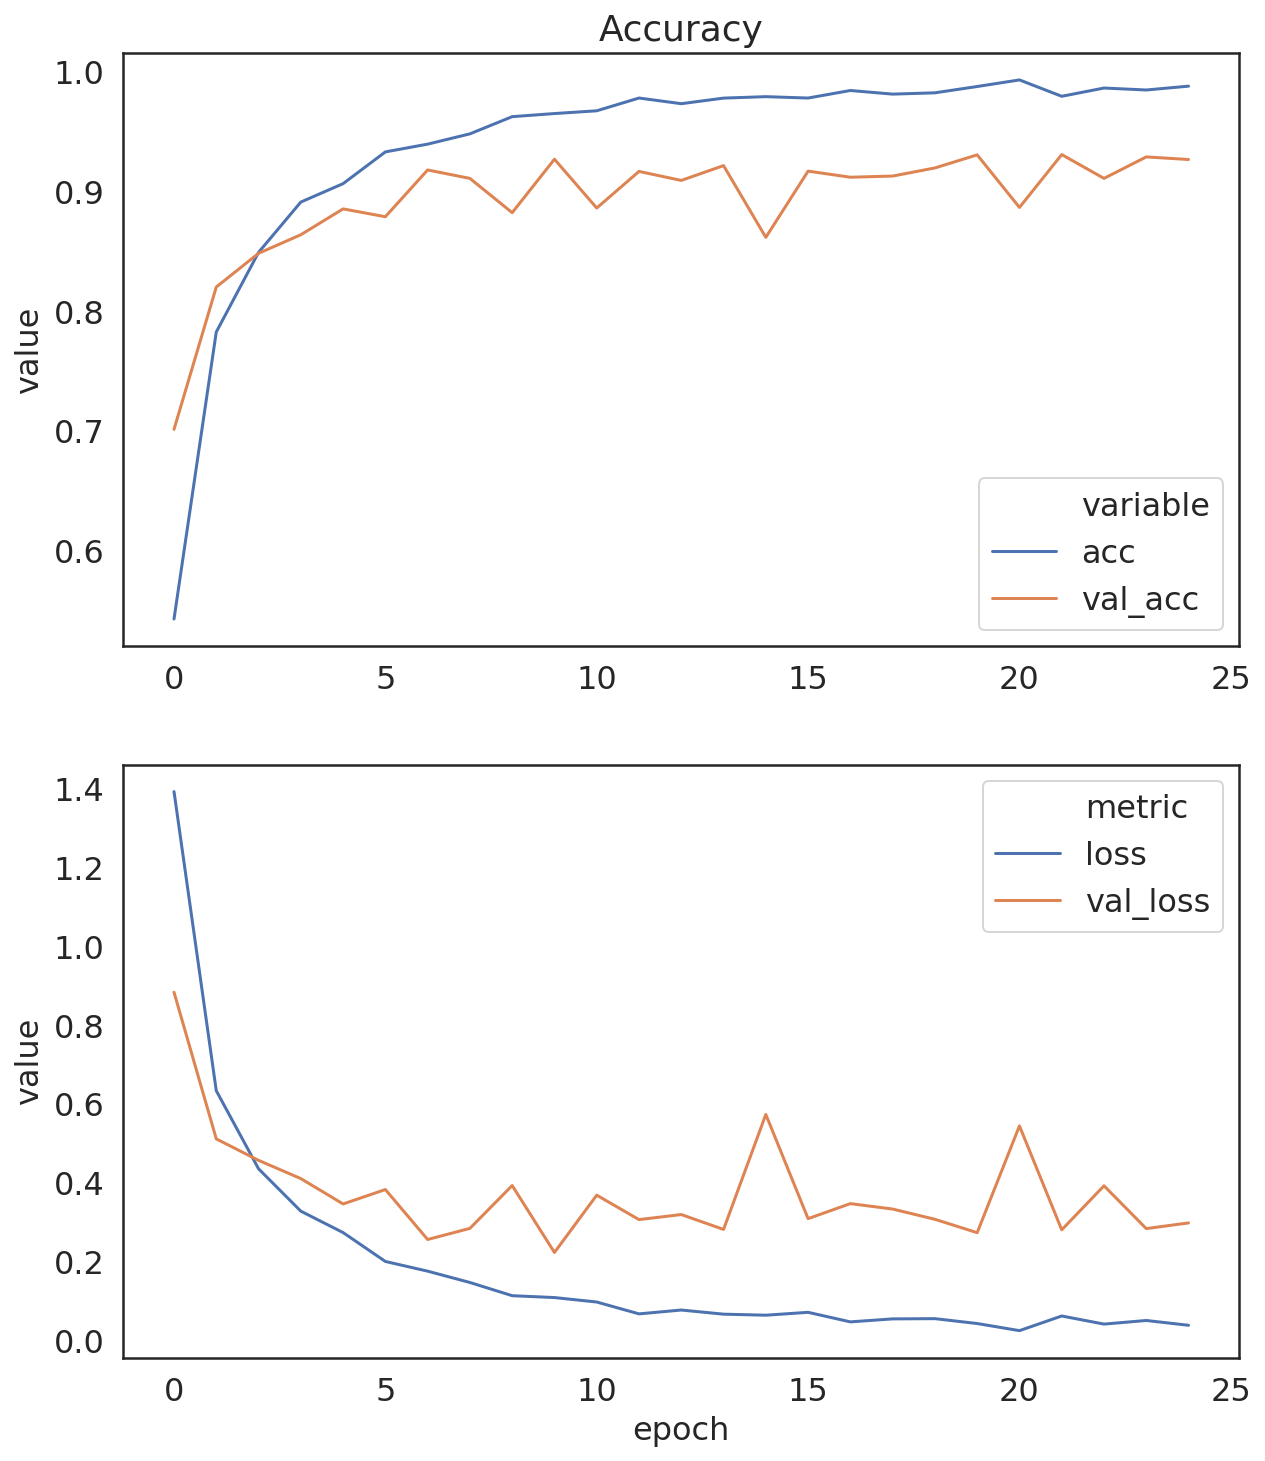

In [7]:
# SOLUTION

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Dense network for end classification

model.add(Flatten())
model.add(Dense(15, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=25  # we've increased the number of epochs a bit to get nicer images
)
lib.plot_history(history);

This network performs extremely well. It will build a feature hierarchy and in this way compress the original input image to a very small image with many feature channels (the last dimension in the output shape in the summary). These feature channels are passed along to a dense layer for the final classification.

## Class activation maps
We can have a look at the **class activation maps** for the healthy and metastasised classes. These will tell us where the filters of the convolutional layers activate in order to predict a certain class. In other words, the class activation maps will tell us which areas of the image are important **for that layer** to predict the target class.

We will show an overlay for an input image for each convolutional layer with respect to the first four classes. Generating the activation images is an optimization problem and will take a lot of time if we generate them for each combination of convolution layer and class.

**Hint**: you can try changing the `example_index` variable to look at the class activation maps of different examples.

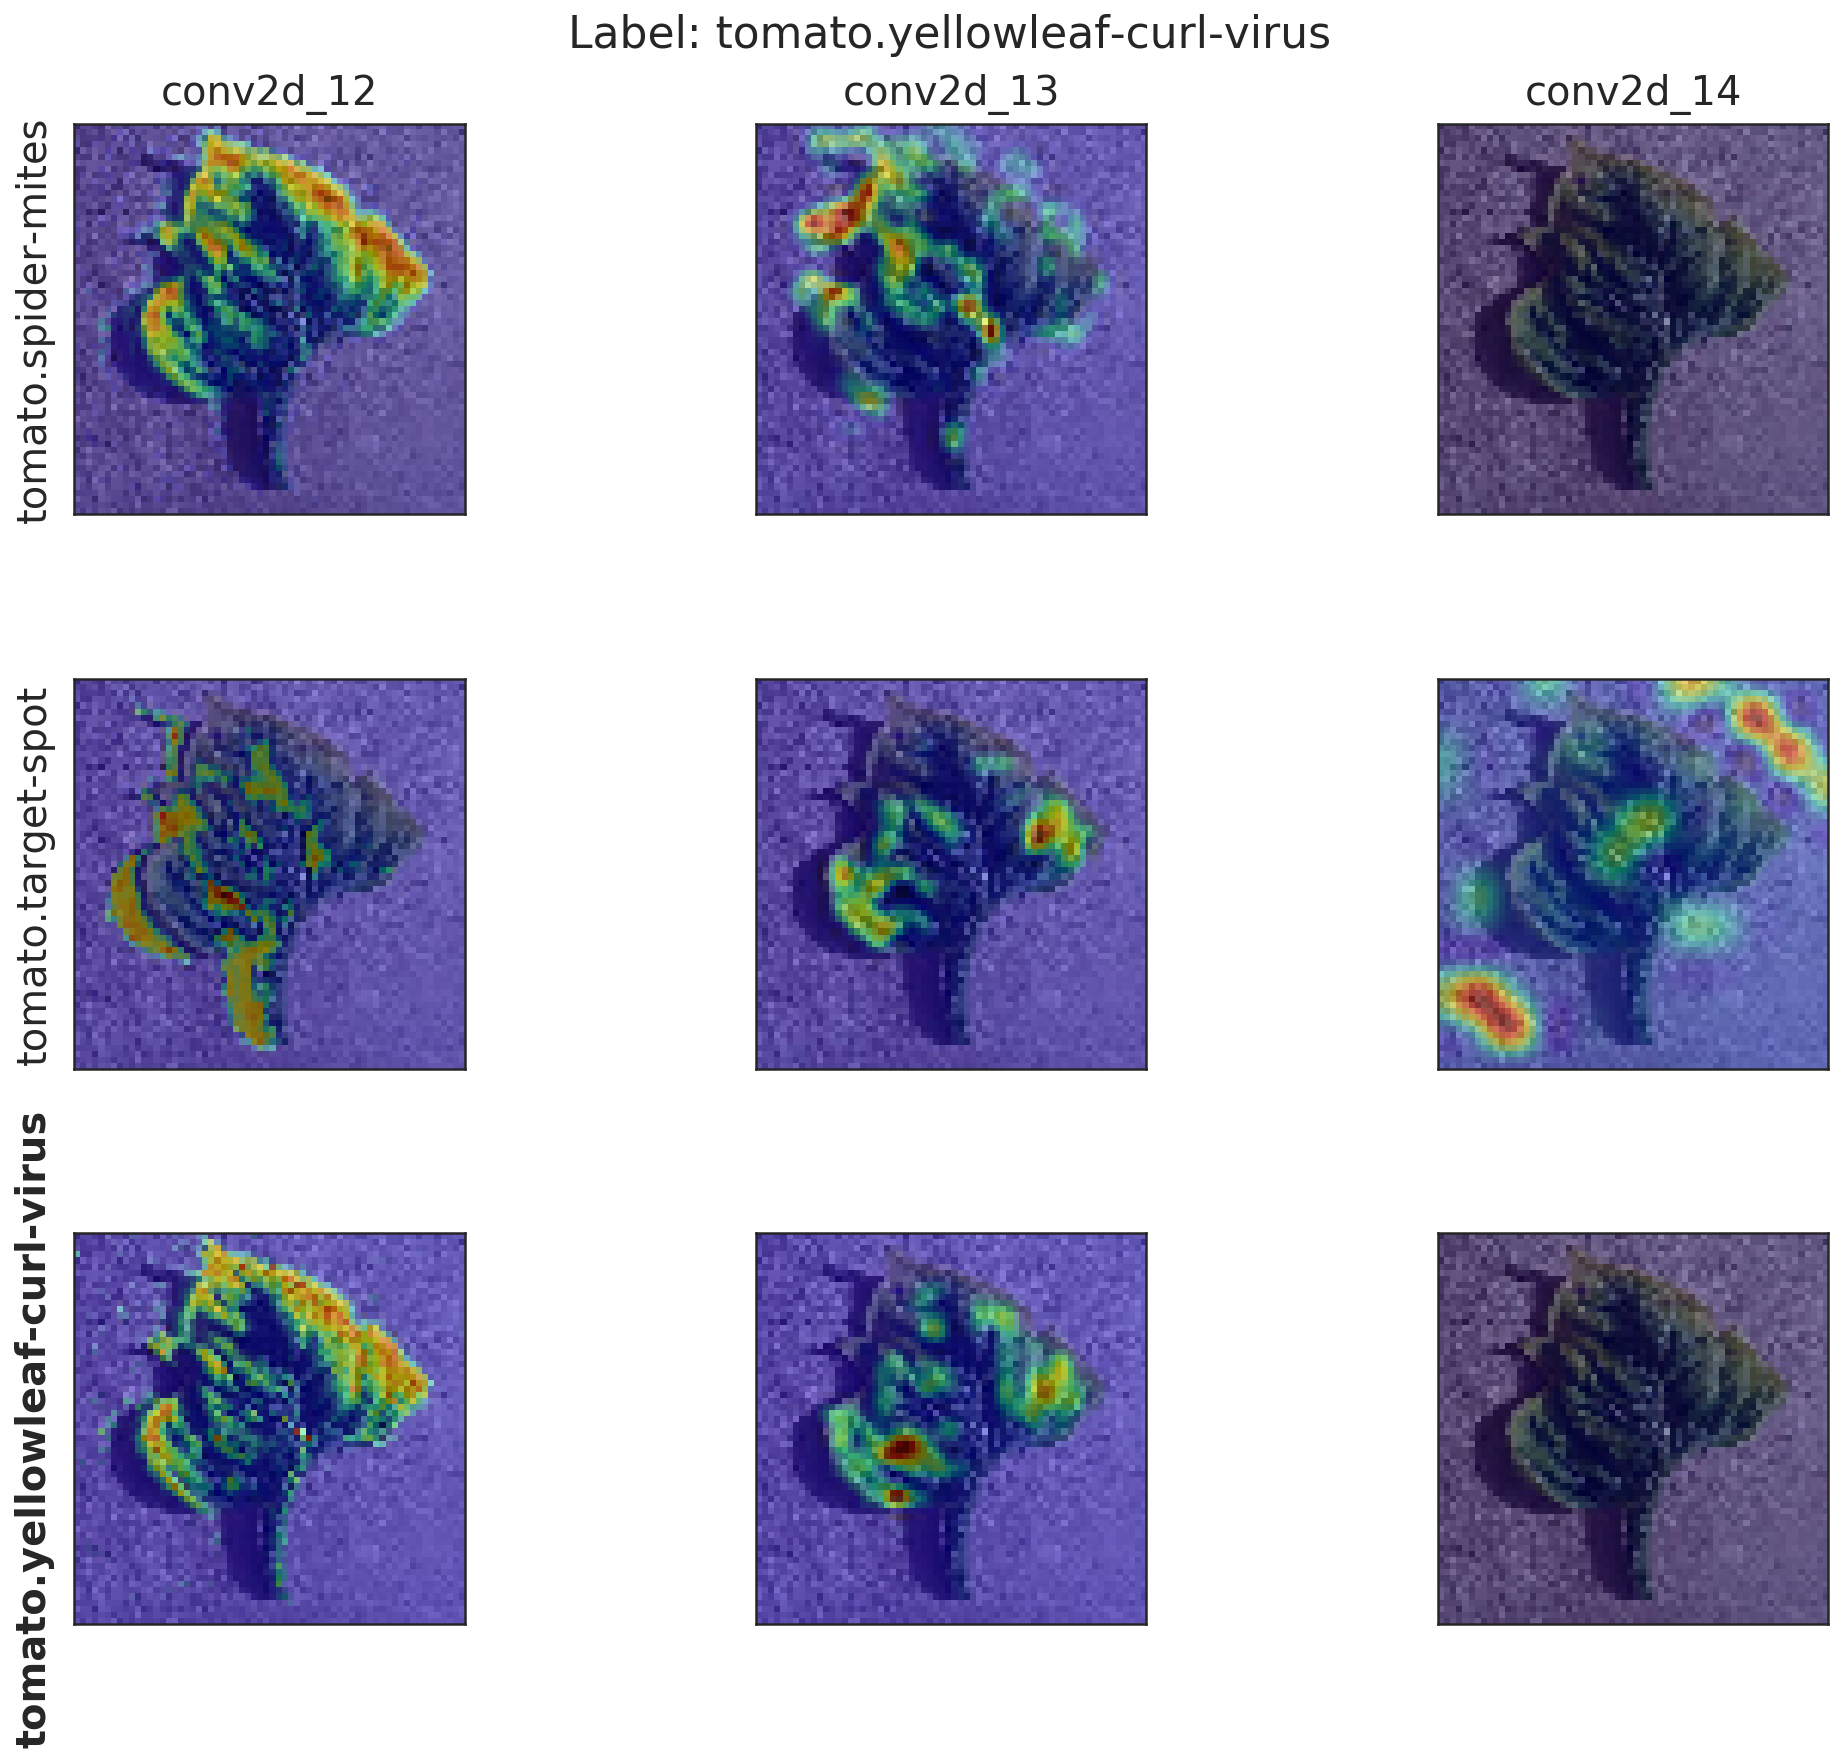

In [8]:
import numpy as np

example_index = 0
lib.plot_cam(model, X_train[example_index], np.argmax(Y_train[example_index]), labels);

What the image above will show is where a particular convolutional layer will activate in order to maximise the prediction of a certain class. It may give you some idea about where a particular filter is 'looking' in order to come to a certain decision. The row label in bold is the correct label for that image.

## Exercise 5
The plots above show the activation maps from the first convolutional layer to the last, from left to right. We can see the activations become focused on larger areas, and become less granular we go deeper into the network. Why do you think that is?

**Hint**: think about the last operation in each convolutional block. How will it affect filter responses?

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: the filters of the first convolutional layer will process the entire input image and will activate on patterns present at that level of resolution. The second convolutional layer will be presented with an image that is downscaled by a factor two due to max pooling. As a consequence, a single pixel in that downscaled image actually consists of 2 x 2 pixels in the original image.

Similarly, when a filter activates four convolutional layers down the network, it is actually activating on 8 by 8 pixels in the original image. These pixels are 'compressed' into a single pixel with many feature maps. 'Blowing up' this original pixel to its original size will give us the heat maps at different scales in the class activation maps.

## Activations
Another way to find out what the network is doing is by looking at the convolutional filters at each layer. The best way to investigate these is to generate an image that would maximally activate a given filter. That is: if we provide a certain filter with an image, it should activate to its maximum extent. In this way, it will show us what visual pattern it has learnt to detect.

## Exercise 6
In the cell below, fill in the name of the **second** convolutional layer you trained in exercise 4, and run the cell. It will show you the patterns for the first 32 filters of the second convolutional layer. Do the patterns make sense to you? What patterns do you expect to see? Fill in your answer in the cell below.

**Notes**:
* This can take a minute or three, since each image is generated by optimisation;
* Not all activations will show you a pattern. This is because not all filters will be optimised evenly.

In [ ]:
layer_name = '<FILL IN>'
lib.plot_activations(model, layer_name, 32);

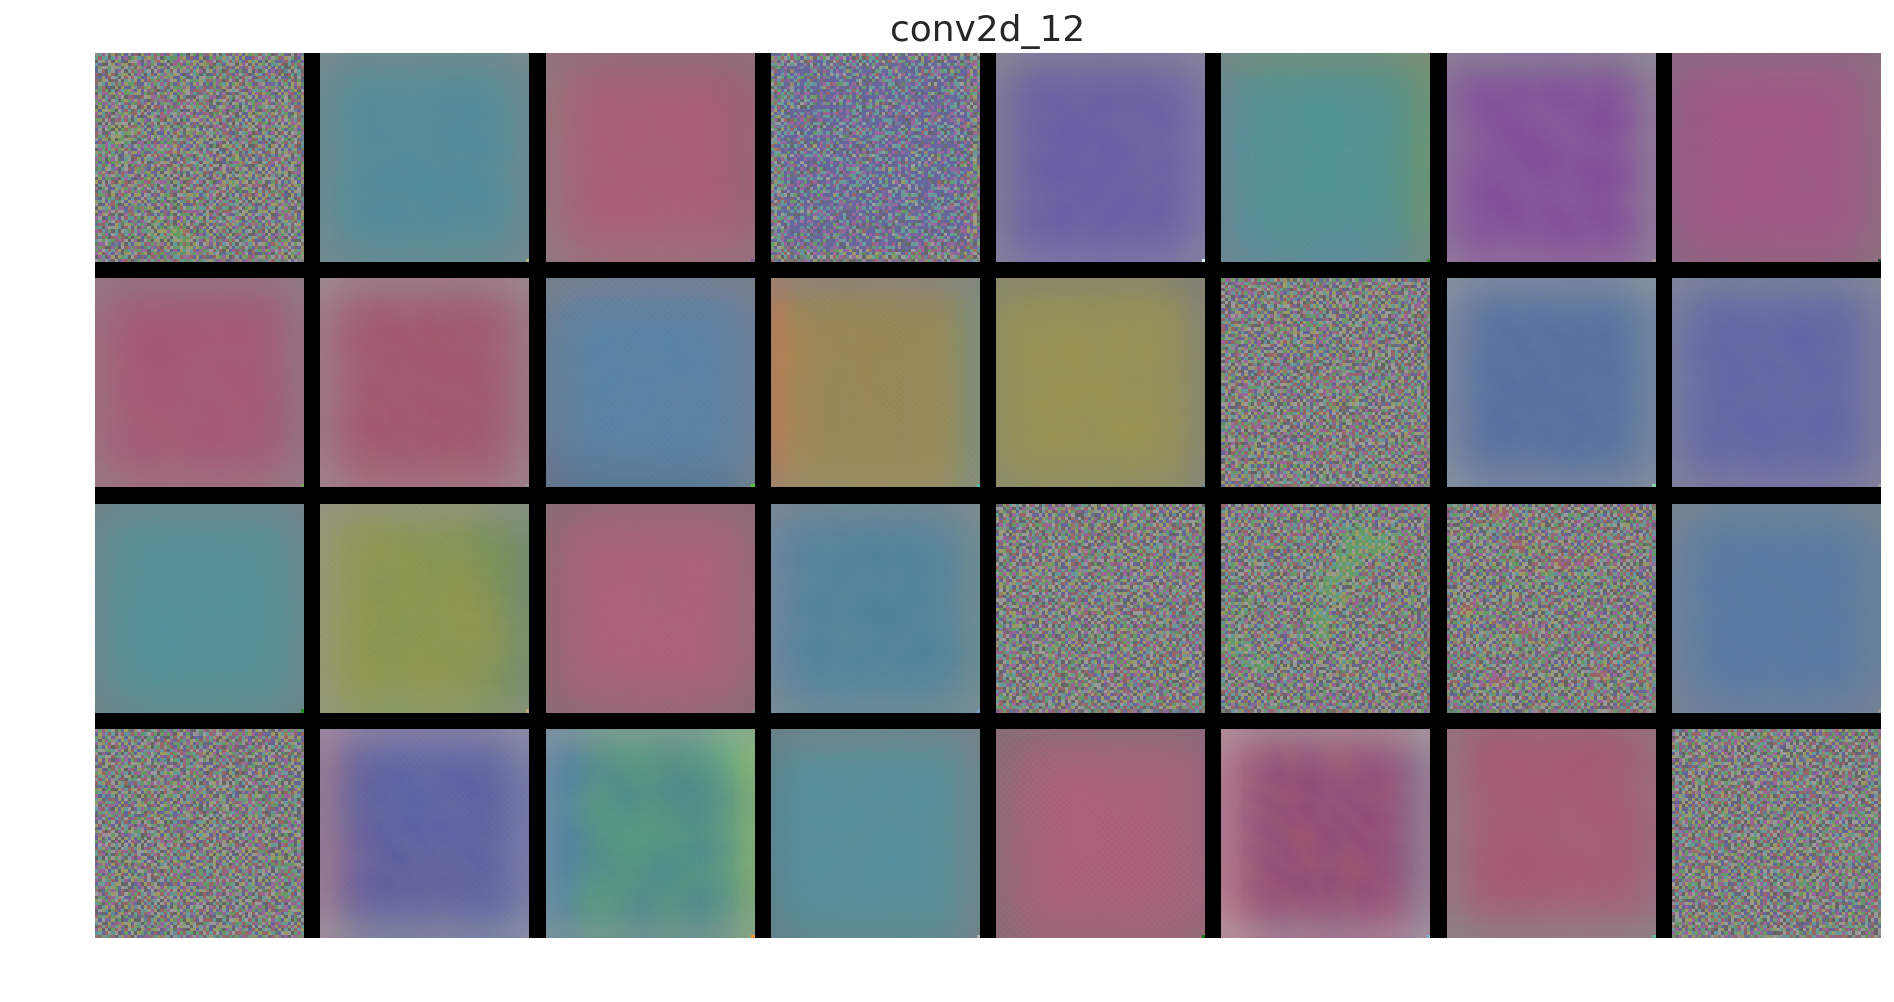

In [9]:
# SOLUTION

layer_name = 'conv2d_12'
lib.plot_activations(model, layer_name, 32);

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: we expect to see several relatively simple patterns composed of multiple lines and or blobs/circles. This is because the second convolutional layer will assemble features from the first layer, which is typically composed of filters detecting line and circle patterns. Furthermore, we hope to see patterns of different colours, and at different orientations.

## Exercise 7
Rerun exercise 6, this time with the **last** convolutional layer. Do you see a difference in the complexity of the patterns? Why?

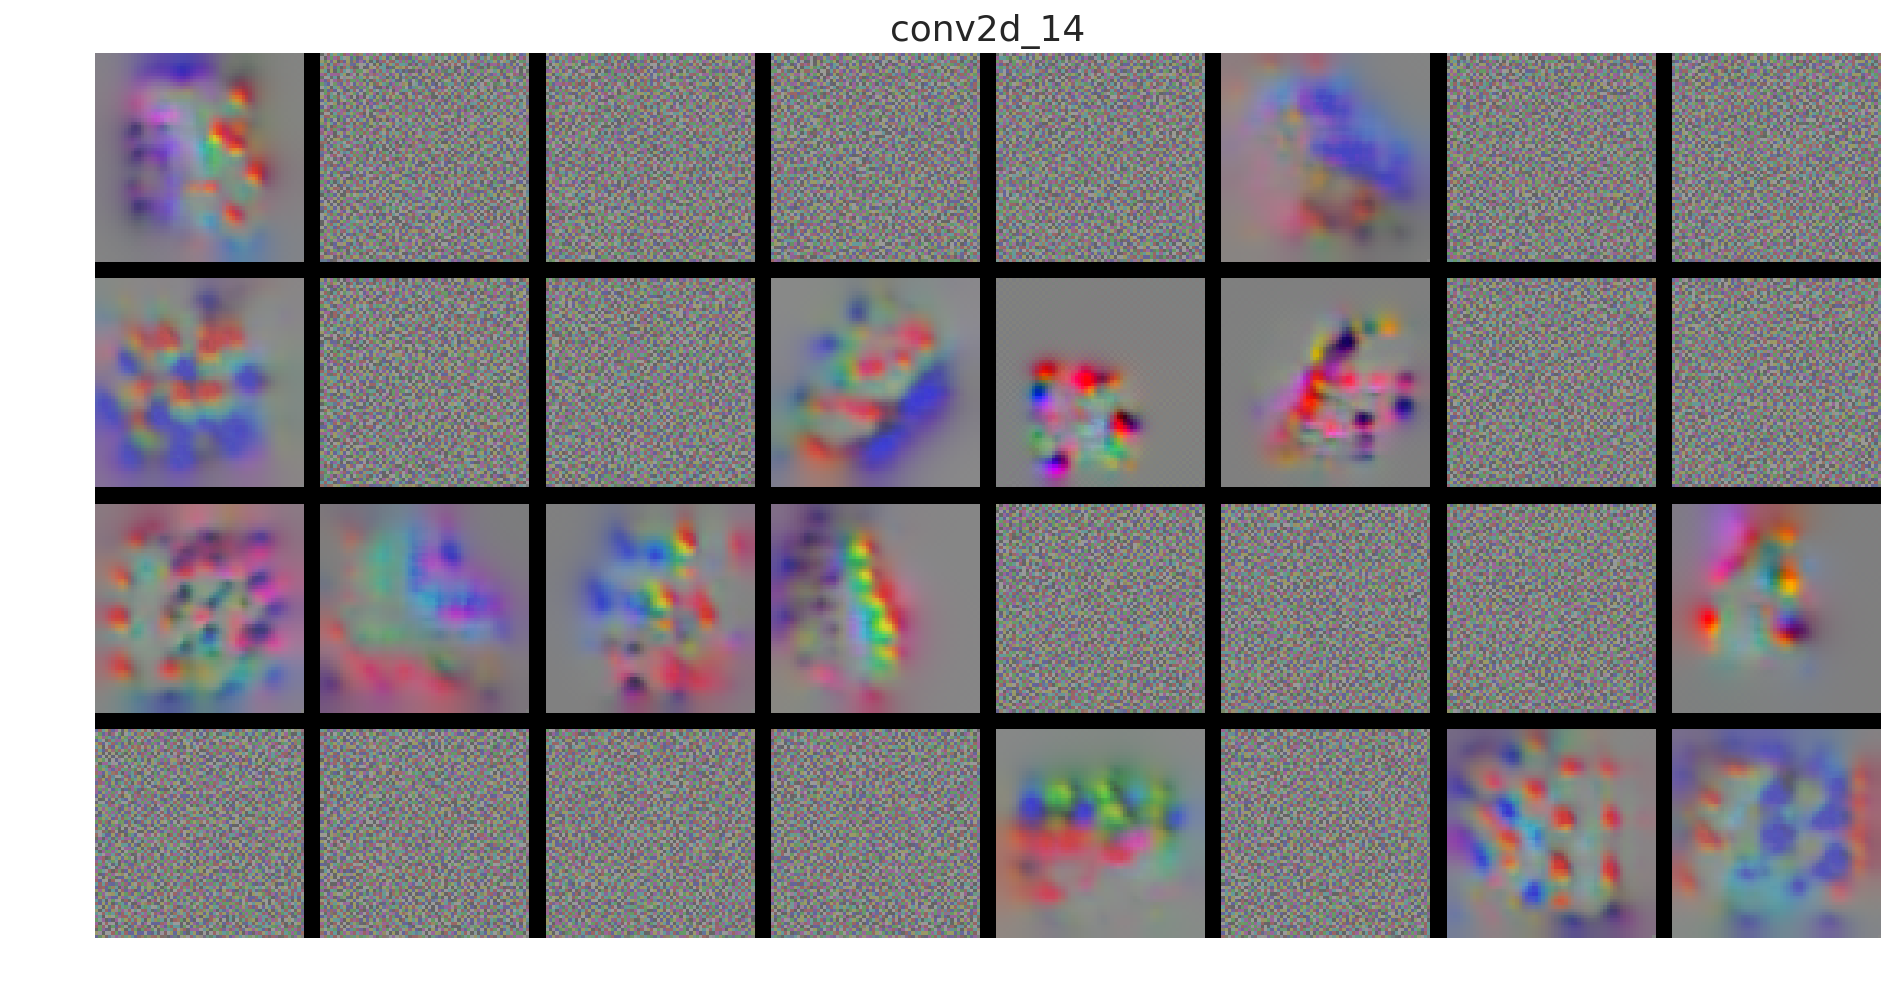

In [10]:
layer_name = 'conv2d_14'
lib.plot_activations(model, layer_name, 32);

In [ ]:
# FILL IN YOUR ANSWERE HERE

**Answer**: the later layers of a CNN will typically consist of more complex patterns made up of multiple lines, blobs and colours. These will become more specific to the problem you are trying to solve.

It may be a stretch to imagine the patterns above to do much in the way of detecting plant diseases. In general, these visualisations look better when networks are trained longer and with more data. Please note that not all filters are trained: some of them are simply noise.

## Bonus exercise (hard)
Create a fully convolutional network. This network does not have any dense layers. The last layer will consists of a convolutional layer that outputs two probabilities using sigmoid activation. How does its performance compare to the network you designed in exercise 4?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 256)         295168    
__________

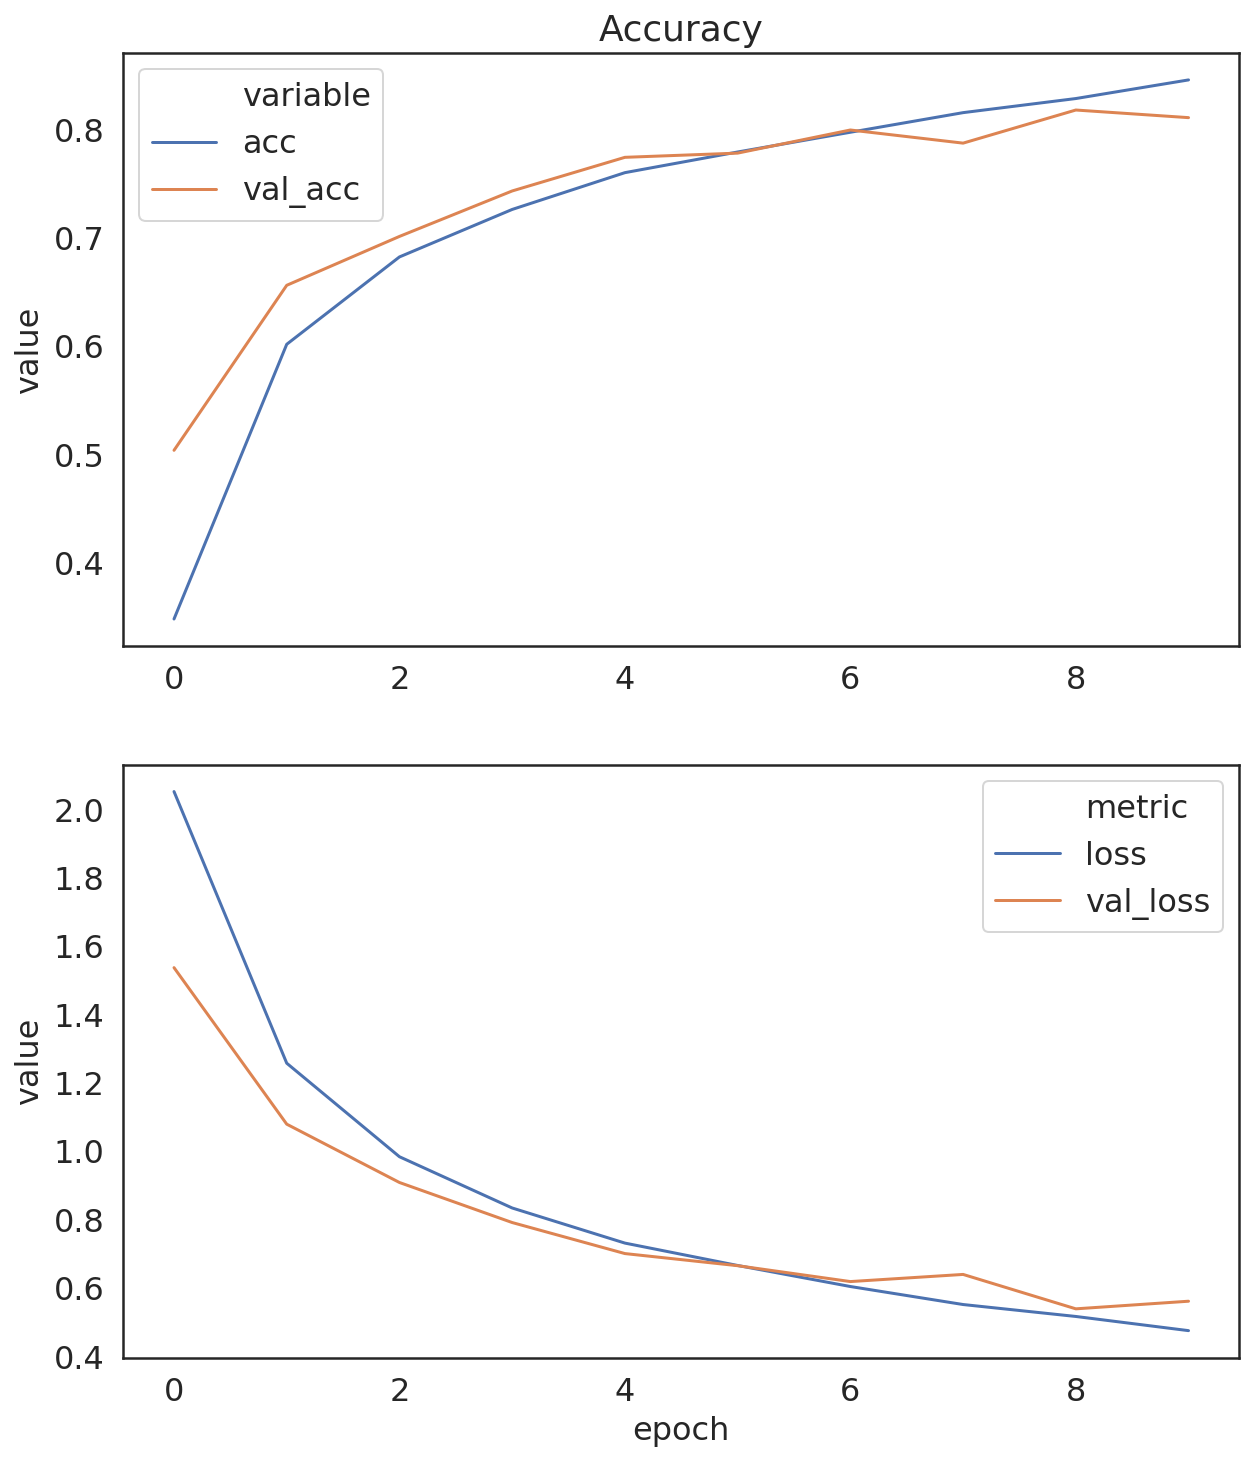

In [13]:
# SOLUTION

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Instead of a dense layer, we have a single Conv2D with softmax activation to give us the final probabilities

model.add(Conv2D(15, kernel_size=2, activation='softmax'))
model.add(Flatten())

model.summary()

model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10
)
lib.plot_history(history);

## Bonus exercise (hard)
Look at the number of parameters for the convolutional layers in exercise 4. How do you arrive at the numbers listed in the summary? Write down your answer in the cell below.

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: as an example, consider the output of the first layer, consisting of 32 feature maps, going into the second convolutional layer with a kernel of size 3 by 3. Then, **for each** feature map we train 64 kernels of size 3 by 3, which is 32 * 64 * 3 * 3 = 18.432 weights. With an additional weight per kernel, we get 64 bias parameters, leading to a total of 18.432 weight parameters + 64 bias parameters = 18496 parameters in total.